### Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

    Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.



   Ответ:
   Пусть имеем события:
    A - подзреваемый виновен
    B - у подозреваемого редкая группа крови
    
   Прокурор оценил вероятность P(B). Должен был оценить вероятность P(A | B)  
   Из формулы Байеса P(A | B) = P(B | A) * P(A) / P(B), где P(B | A) = 1, P(B) = 0.01  
   P(A | B) = 100 * P(A)  

   2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

   
   Ответ:
   Адвокат оценил вероятность события не относящегося к делу. Адвокат должен был оценить вероятность $ P(\overline B | A) $

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.  

    Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).  
    
    Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [70]:
import numpy as np
import matplotlib.pyplot as plt

t - результат теста, d - наличие болезни
$$ p(d = 1|t = 1) = \frac{p(t = 1|d = 1)p(d = 1)}{p(t = 1|d = 1)p(d = 1) + p(t = 1|d = 0)p(d = 0)} $$

$$ p(d = 1|t = 0) = \frac{p(t = 0|d = 1)p(d = 1)}{p(t = 0|d = 1)p(d = 1) + p(t = 0|d = 0)p(d = 0)} $$

In [7]:
def probability(t, fp = 0.05, fn = 0.05):
    if t == 1:
        return (1 - fn) * 0.01 / ((1 - fn) * 0.01 + fp * 0.99)
    else:
        return fn * 0.01 / (fn * 0.01 + (1 - fp) * 0.99)

In [9]:
probability(1)

0.16101694915254236

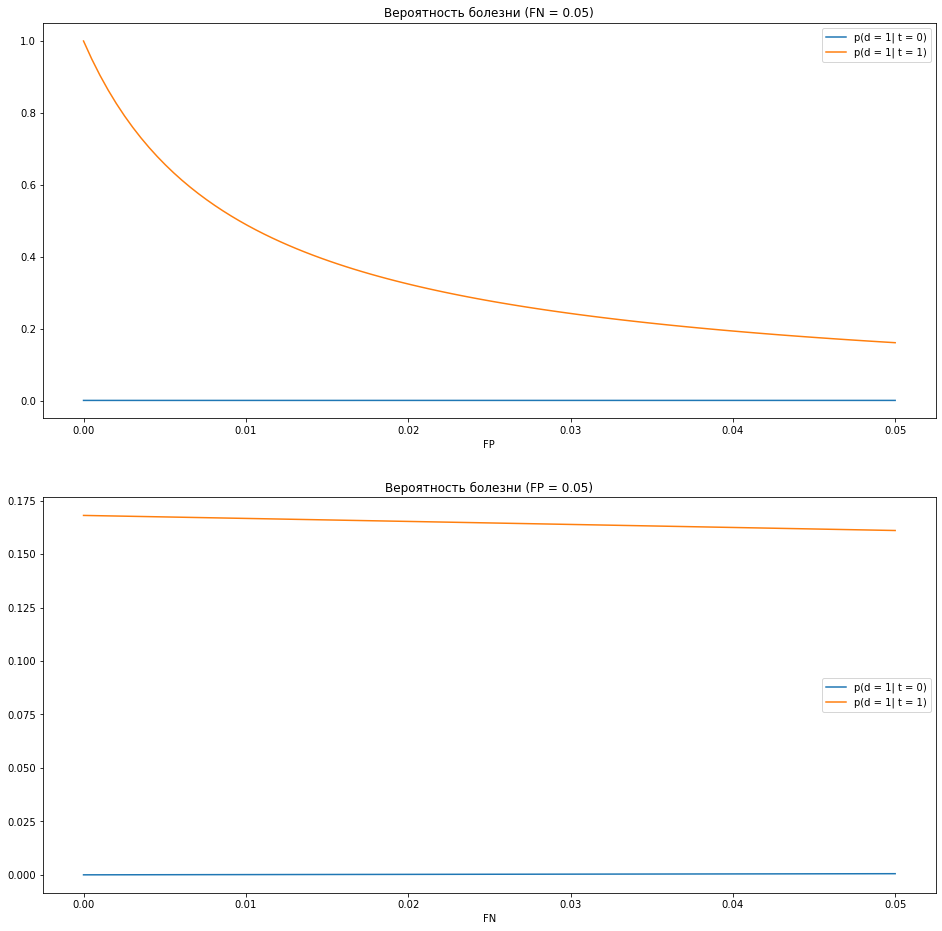

In [46]:
fp_x = np.linspace(0, 0.05, 100)
fn_x = np.linspace(0, 0.05, 100)

fig, ax = plt.subplots(2, figsize=(16, 16))

ax[0].set_title('Вероятность болезни (FN = 0.05)')
ax[0].set_xlabel('FP')
line1, = ax[0].plot(fp_x, probability(0, fp = fp_x))
line2, = ax[0].plot(fp_x, probability(1, fp = fp_x))
line1.set_label('p(d = 1| t = 0)')
line2.set_label('p(d = 1| t = 1)')
ax[0].legend()

ax[1].set_title('Вероятность болезни (FP = 0.05)')
ax[1].set_xlabel('FN')
line1, = ax[1].plot(fn_x, probability(0, fn = fn_x))
line2, = ax[1].plot(fn_x, probability(1, fn = fn_x))
line1.set_label('p(d = 1| t = 0)')
line2.set_label('p(d = 1| t = 1)')
ax[1].legend()

Вероятность выявления болезни сущесвенно увеличивается при уменьшении FP, соотвественно необходимо сосридоточится на уменьшении FP.

### Часть II: О линейной регрессии

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:  
https://ourworldindata.org/coronavirus-source-data


In [210]:
import pandas as pd
import datetime
from scipy.stats import multivariate_normal

In [171]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [159]:
startDate = datetime.datetime.strptime("2020-03-03", "%Y-%m-%d")
endDate = startDate + datetime.timedelta(days=50)
startDate = startDate.strftime("%Y-%m-%d")
endDate = endDate.strftime("%Y-%m-%d")
startDate, endDate

('2020-03-03', '2020-04-22')

In [172]:
df['new_cases'].replace(0, 1, inplace=True)
df = df[(df.location == 'Russia') & (df.date >= startDate)]
df = df.fillna(0)

df = df.reset_index()
df['days'] = df.index + 1

train_df, test_df = df[:50], df[50:]

In [173]:
train_df.head()

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,days
0,52760,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,0.0,0.0,...,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824,1
1,52761,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,0.0,0.0,...,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824,2
2,52762,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,0.0,0.0,...,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824,3
3,52763,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,0.0,0.0,...,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824,4
4,52764,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,0.0,0.0,...,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824,5


In [156]:
train_df.describe()

,days,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,50.00,5.000000e+01,5.000000e+01,50.0,50.00,5.000000e+01,5.000000e+01
mean,52784.50000,8202.460000,1055.300000,754.145700,67.200000,9.120000,6.394320,56.206500,7.23060,5.167680,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01
std,14.57738,13530.534343,1610.954556,1196.835276,115.361543,14.531654,10.567951,92.716572,11.03933,8.201171,...,3.674914e-12,2.803737e-17,5.742052e-14,0.00,7.177566e-15,1.435513e-14,0.0,0.00,1.435513e-14,1.121495e-16
min,52760.00000,3.000000,1.000000,0.143000,0.000000,0.000000,0.000000,0.021000,0.00000,0.001000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01
25%,52772.25000,69.750000,18.750000,7.535500,0.000000,0.000000,0.000000,0.478250,0.12800,0.051500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01
50%,52784.50000,1150.000000,212.000000,124.357000,4.000000,1.000000,0.429000,7.880000,1.45250,0.852000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01
75%,52796.75000,9766.250000,1388.000000,915.857500,72.750000,11.750000,6.392500,66.922500,9.51150,6.275750,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01
max,52809.00000,52763.000000,6060.000000,4523.000000,456.000000,51.000000,40.857000,361.553000,41.52500,30.993000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.18,2.340000e+01,5.830000e+01,0.0,8.05,7.258000e+01,8.240000e-01


In [109]:
test_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.0,310.0,3.100000e+02,310.00,3.100000e+02
mean,1.620218e+06,13264.641935,13199.635503,28694.041935,267.822581,264.377403,11102.367516,90.894516,90.449061,196.622787,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01
std,1.220050e+06,7819.419770,7831.076784,23780.539939,176.871530,173.404828,8360.259286,53.581715,53.661616,162.953585,...,3.643861e-12,1.390023e-17,5.693532e-14,8.896144e-16,3.558458e-15,0.0,0.0,1.779229e-15,0.00,1.112018e-16
min,5.799900e+04,4639.000000,4720.286000,513.000000,42.000000,45.000000,397.432000,31.788000,32.345000,3.515000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01
25%,7.013718e+05,6394.250000,6342.535750,10694.000000,119.000000,120.571000,4806.073750,43.816000,43.461250,73.279500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01
50%,1.120732e+06,10239.000000,9753.357000,19793.500000,181.000000,164.857000,7679.690500,70.161500,66.833500,135.632500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01
75%,2.539222e+06,20213.250000,20154.642750,44631.750000,448.500000,463.178250,17399.745750,138.509000,138.107750,305.834500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01
max,4.164802e+06,29499.000000,28501.143000,83481.000000,624.000000,554.571000,28538.852000,202.139000,195.301000,572.044000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,58.3,0.0,8.050000e+00,72.58,8.240000e-01


2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.


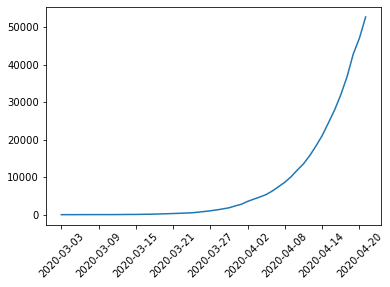

In [148]:
plt.xticks(np.arange(0, 50, 6), rotation=45)
plt.plot(train_df.date, train_df.total_cases)

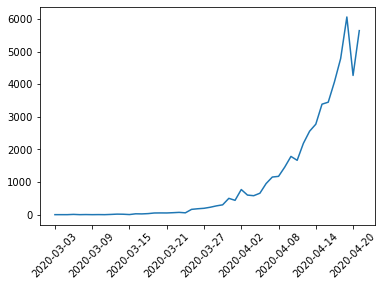

In [150]:
plt.xticks(np.arange(0, 50, 6), rotation=45)
plt.plot(train_df.date, train_df.new_cases)

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [151]:
from sklearn.linear_model import LinearRegression

In [187]:
lr = LinearRegression()
lr.fit(train_df.days.values.reshape(-1, 1), np.log(train_df.total_cases.values))

LinearRegression()

In [188]:
lr.coef_, lr.intercept_

(array([0.19829091]), 1.6224462364488117)

In [197]:
pred_train = lr.predict(train_df.days.values.reshape(-1, 1))
pred_test = lr.predict(test_df.days.values.reshape(-1, 1))

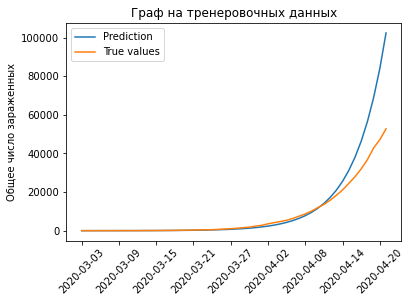

In [205]:
plt.xticks(np.arange(0, 50, 6), rotation=45)
fig, = plt.plot(train_df.date, np.exp(pred_train), label="Prediction")
plt.plot(train_df.date, train_df.total_cases, label="True values")
plt.ylabel('Общее число зараженных')
plt.title('Граф на тренеровочных данных')
plt.legend();

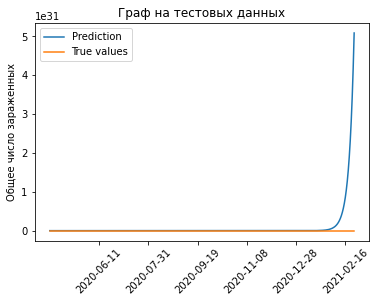

In [208]:
plt.xticks(np.arange(50, 360, 50), rotation=45)
plt.plot(test_df.date, np.exp(pred_test), label="Prediction")
plt.plot(test_df.date, test_df.total_cases, label="True values")
plt.ylabel('Общее число зараженных')
plt.title('Граф на тестовых данных')
plt.legend();

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).


In [308]:
N = 250
xs = np.linspace(0, 50, N)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-1, 2))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

(250, 250)


<ipython-input-308-5a3916640ab2>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


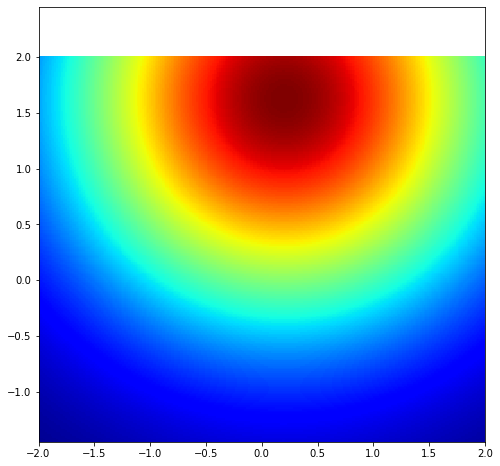

In [309]:
cur_mu, cur_sigma = np.array([lr.coef_[0], lr.intercept_]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
myplot_heatmap(Z)

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


In [312]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((0, 10**3))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

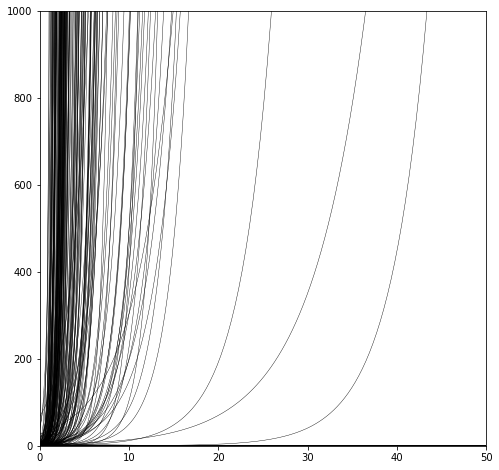

In [313]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
myplot_sample_lines(cur_mu, cur_sigma, 200)

In [314]:
def bayesian_update(mu, sigma, x, y, sn):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [315]:
sn = np.std(pred_train - np.log(train_df.total_cases))

for i in range(train_df.shape[0]):
    px, py = train_df.days.iloc[i], np.log(train_df.total_cases.iloc[i])
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sn)

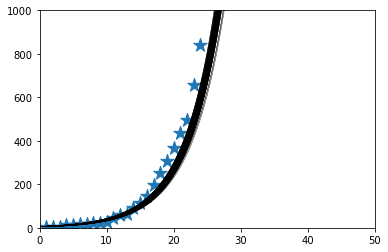

In [316]:
myplot_sample_lines(cur_mu, cur_sigma, 200, points=[df['days'], df['total_cases']])

In [342]:
def predict(mu, sigma, days, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, 1))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*days)
    return np.mean(res)

In [347]:
predict(cur_mu, cur_sigma, 30)

1906.9565523387628

In [352]:
date_start = datetime.datetime.strptime("2020-03-03", "%Y-%m-%d")
date_may = datetime.datetime.strptime("2020-05-01", "%Y-%m-%d")
date_june = datetime.datetime.strptime("2020-06-01", "%Y-%m-%d")
date_september = datetime.datetime.strptime("2020-09-01", "%Y-%m-%d")

may_days = (date_may - date_start).days
june_days = (date_june - date_start).days
september_days = (date_september - date_start).days

may_pred = int(predict(cur_mu, cur_sigma, may_days))
june_pred = int(predict(cur_mu, cur_sigma, june_days))
september_pred = int(predict(cur_mu, cur_sigma, september_days))

print(f'К 1 мая модель предсказывает всего {may_pred} случаев')
print(f'К 1 июня модель предсказывает всего {june_pred} случаев')
print(f'К 1 сентября модель предсказывает всего {september_pred} случаев')

К 1 мая модель предсказывает всего 646766 случаев
К 1 июня модель предсказывает всего 284694517 случаев
К 1 сентября модель предсказывает всего 29051181723831948 случаев


In [358]:
print(f'К 1 мая было всего {int(df[df.date == "2020-05-01"].total_cases.values[0])} случаев')
print(f'К 1 июня было всего {int(df[df.date == "2020-06-01"].total_cases.values[0])} случаев')
print(f'К 1 сентября было всего {int(df[df.date == "2020-09-01"].total_cases.values[0])} случаев')

К 1 мая было всего 114431 случаев
К 1 июня было всего 414328 случаев
К 1 сентября было всего 997072 случаев
